<a href="https://colab.research.google.com/github/Gogonemnem/Safran-Project/blob/main/Visualization_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!git clone https://github.com/Gogonemnem/Safran-Project

Cloning into 'Safran-Project'...
remote: Enumerating objects: 389, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 389 (delta 129), reused 150 (delta 96), pack-reused 184
Receiving objects: 100% (389/389), 10.26 MiB | 9.23 MiB/s, done.
Resolving deltas: 100% (210/210), done.


## DATA LOADING

In [3]:
# Load the data
results = pd.read_csv("results.csv", sep=",")

### Different model configurations
Models:
* BERT
* AeroBot
* SafeAeroBERT
* Longformer

Configurations:
* Unfrozen 
* Abbreviated 
* Loss: BCE, BCE-Balanced, BinaryFocal, BinaryFocal-Balanced

Prediction set:
* Group
* Subcategory

Create indicators to select the model type and configuration

In [4]:
# Model indicator
def model_indic(x):
    if "SafeAeroBERT" in x:
        return "SafeAeroBERT"
    elif "longformer" in x:
        return "LongFormer"
    elif "AeroBOT_bert-base-uncased" in x:
        return "AeroBOT"
    else:
        return "BERT"

In [5]:
# Configuration indicator

# Layer configuration (frozen / unfrozen)
def frozen_config(x):
    if "Unfrozen" in x:
        return "unfrozen"
    else:
        return "frozen"


# Training data configuration (non-abbreviated / abbreviated)
def training_config(x):
    if "Abbreviated" in x:
        return "abbreviated"
    else:
        return "non-abbreviated"
    

# Loss configuration (BCE / FocalLoss / Balanced / Unbalanced)
def loss_config(x):
    if "BCE" in x:
        if "Balanced" in x:
            return "BCE_balanced"
        else: 
            return "BCE_unbalanced"
    else:
        if "Balanced" in x:
            return "FocalLoss_balanced"
        else: 
            return "FocalLoss_unbalanced"

In [6]:
# Prediction set indicator
def prediction_set(x):
    if "Subcategory" in x:
        return "subcategory"
    else: 
        return "group"

In [7]:
# Apply the indicators
results["Model"] = results["Model Name"].apply(model_indic)
results["Layer"] = results["Model Name"].apply(frozen_config)
results["Training_data"] = results["Model Name"].apply(training_config)
results["Loss"] = results["Model Name"].apply(loss_config)
results["Prediction_set"] = results["Model Name"].apply(prediction_set)

In [8]:
import re 

# Change model configuration names
def shorten_model_name(name):
    # Define regular expression patterns and their corresponding replacements
    patterns = [
        (r'AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE', 'AeroBOT'),
        (r'AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_Subcategory_BCE', 'AeroBOT_sub'),
        (r'NASA-AIML_MIKA_SafeAeroBERT', 'NasaAeroBERT'),
        (r'allenai_longformer-base-4096', 'Longformer'),
        (r'bert-base-uncased', 'BertBase'),
        (r'Unfrozen\[(.*?)\]', 'Unfrz'),
        (r'BCE-Balanced', 'BCEBal'),
        (r'BinaryFocal-Balanced', 'BinFocalBal'),
        (r'BCE', 'BCE'),
        (r'BinaryFocal', 'BinFocal'),
        (r'Abbreviated', 'Abbrv'),
    ]

    # Apply regular expression replacements
    for pattern, replacement in patterns:
        name = re.sub(pattern, replacement, name)

    return name

# # Obtain unique model configurations
# unique_categories =  results['Model Name'].unique()
# shortened_model_names = [shorten_model_name(name) for name in unique_categories]

# # Use model configurations for axis labels
# xticks = shortened_model_names

# Add column with short_names for plotting
results["Short_name"] = results['Model Name'].apply(shorten_model_name)

## Visualizations

In [9]:
# Function to filter the dataframe for specific models
def filter_results(training_data, loss_list, layer_list, prediction_set, category, results):
    filtered_df = results[
        (results["Training_data"] == training_data) &
        (results["Loss"].isin(loss_list)) &
        (results["Layer"].isin(layer_list)) &
        (results["Prediction_set"] == prediction_set) &
        (results["Category"] == category)
    ].sort_values(by="f1-score")
    return filtered_df

In [10]:
# Function to filter the dataframe for specific models for the boxplot
def filter_boxplot(training_data, loss_list, layer_list, prediction_set, category_list, results):
    filtered_df = results[
        (results["Training_data"] == training_data) &
        (results["Loss"].isin(loss_list)) &
        (results["Layer"].isin(layer_list)) &
        (results["Prediction_set"] == prediction_set) &
        (~results["Category"].isin(category_list))
    ].sort_values(by="f1-score")
    return filtered_df

In [11]:
SAFRAN_model = results[results["Model"] == 'AeroBOT']
names = SAFRAN_model['Model Name'].unique()
SAFRAN_model

,Model Name,Category,binary_accuracy,precision,recall,f1-score,support,Optimization Metric,Threshold,Model,Layer,Training_data,Loss,Prediction_set,Short_name
1530,"AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 1...",Deviation / Discrepancy - Procedural,0.759648,0.749867,0.886174,0.812342,6343.0,0.663756,0.34,AeroBOT,unfrozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_Unfrz_BCE
1531,"AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 1...",Aircraft Equipment,0.904951,0.883657,0.879798,0.881723,4351.0,0.663756,0.49,AeroBOT,unfrozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_Unfrz_BCE
1532,"AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 1...",Conflict,0.945118,0.852136,0.828100,0.839946,1879.0,0.663756,0.67,AeroBOT,unfrozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_Unfrz_BCE
1533,"AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 1...",Inflight Event / Encounter,0.885423,0.739976,0.754024,0.746934,2423.0,0.663756,0.31,AeroBOT,unfrozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_Unfrz_BCE
1534,"AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 1...",ATC Issue,0.897733,0.776866,0.788263,0.782523,2522.0,0.663756,0.46,AeroBOT,unfrozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_Unfrz_BCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,AeroBOT_bert-base-uncased_BCE,No Specific Anomaly Occurred,0.991763,0.000000,0.000000,0.000000,89.0,0.410106,0.00,AeroBOT,frozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_BCE
1694,AeroBOT_bert-base-uncased_BCE,micro avg,0.836623,0.473743,0.726947,0.573647,22871.0,0.410106,NaN,AeroBOT,frozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_BCE
1695,AeroBOT_bert-base-uncased_BCE,macro avg,0.836623,0.347138,0.554361,0.410106,22871.0,0.410106,NaN,AeroBOT,frozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_BCE
1696,AeroBOT_bert-base-uncased_BCE,weighted avg,0.836623,0.536922,0.726947,0.610168,22871.0,0.410106,NaN,AeroBOT,frozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_BCE


### Abbreviations

In [12]:
# Abbreviations
filtered_abb = filter_results("abbreviated", ["BCE_balanced"], "unfrozen", "subcategory", "macro avg", results)

Safran_result = results[(results["Short_name"] == "AeroBOT_BertBase_Unfrz_BCE") & (results["Category"] == "macro avg")]

filtered_abb = pd.concat([filtered_abb, Safran_result], ignore_index=True)

x_values = filtered_abb["Short_name"]
print(x_values)
y_values = filtered_abb["f1-score"]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `str`

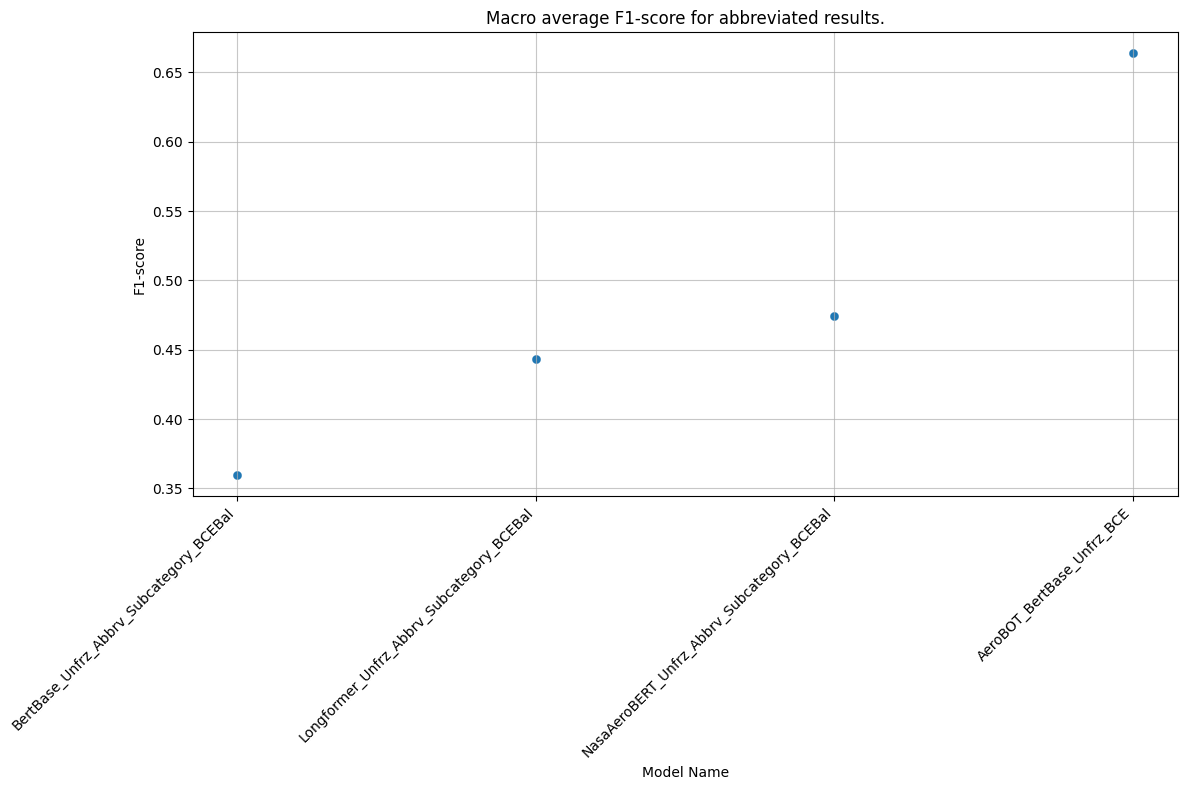

In [39]:
#########################
# Abbreviations plot
#########################

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(x_values, y_values, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for abbreviated results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [12]:
###########################
# Abbreviations violin plot
###########################

# Categories to exclude from plot
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']

# Filter results
filtered_boxplot = filter_boxplot("abbreviated", ["BCE_balanced"], "unfrozen", "group", category_list, results)
filtered_abb = filter_results("abbreviated", ["BCE_balanced"], "unfrozen", "group", "macro avg", results)

# Get unique model names for x-axis ticks
model_names = filtered_boxplot['Short_name'].unique().tolist()

# Plot
plt.figure(figsize=(8, 6))

# Violin plot
sns.violinplot(data=filtered_boxplot, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette='deep')
plt.title('Box Plot of F1-scores by selected Abbreviation Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)

plt.show()

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `str`

### Unfrozen

In [175]:
# Layers frozen or not

# Select baseline model and target models
filtered_unfrozen = filter_results("non-abbreviated", ["BCE_balanced"], "unfrozen", "subcategory", "macro avg", results)
#Safran_result = results[(results["Short_name"] == "AeroBOT_BertBase_Unfrz_BCE") & (results["Category"] == "macro avg")]
#filtered_unfrozen = pd.concat([filtered_unfrozen, Safran_result], ignore_index=True)

x_values = filtered_unfrozen["Short_name"]
print(x_values)
y_values = filtered_unfrozen["f1-score"]

639        BertBase_Unfrz_Subcategory_BCEBal
771      Longformer_Unfrz_Subcategory_BCEBal
705    NasaAeroBERT_Unfrz_Subcategory_BCEBal
Name: Short_name, dtype: object


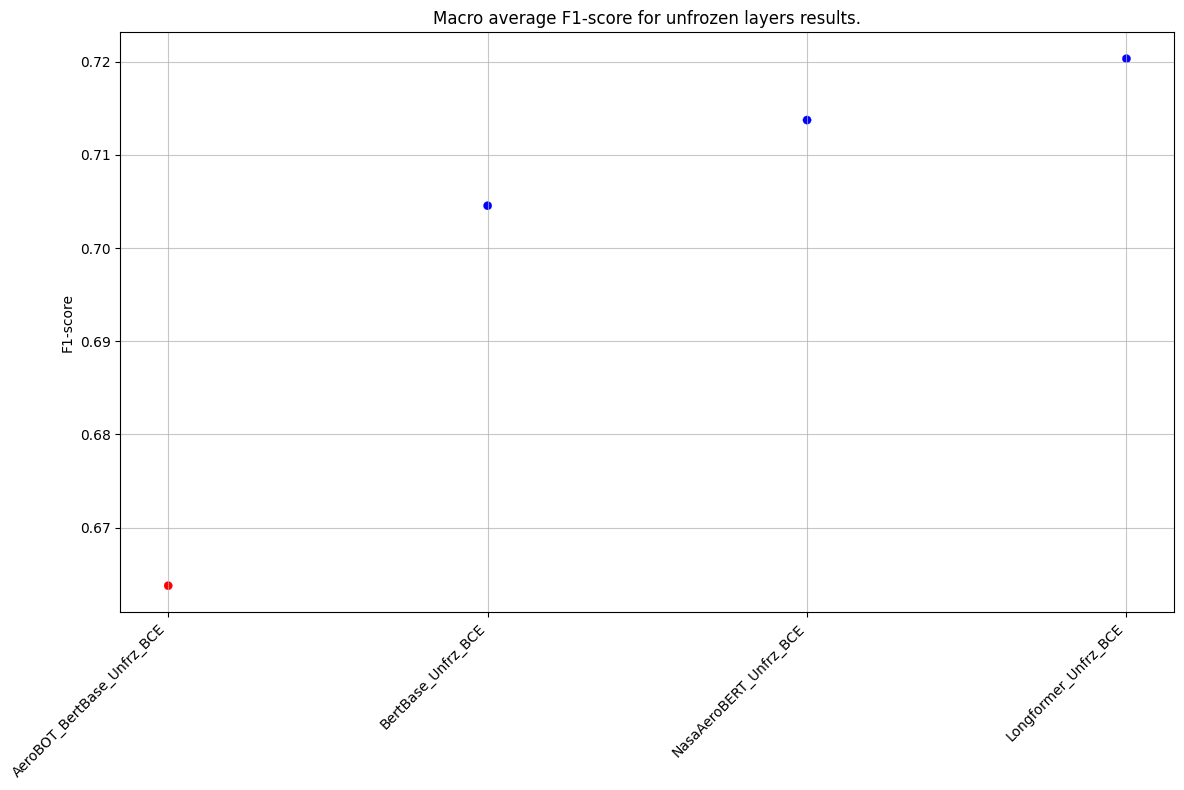

In [149]:
import matplotlib.pyplot as plt

colors = ['red' if x == 'AeroBOT_BertBase_Unfrz_BCE' else 'blue' for x in x_values]


# Abbreviations visualization
plt.figure(figsize=(12, 8))

# Scatter plot with customized colors
plt.scatter(range(len(x_values)), y_values, c=colors, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
#plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


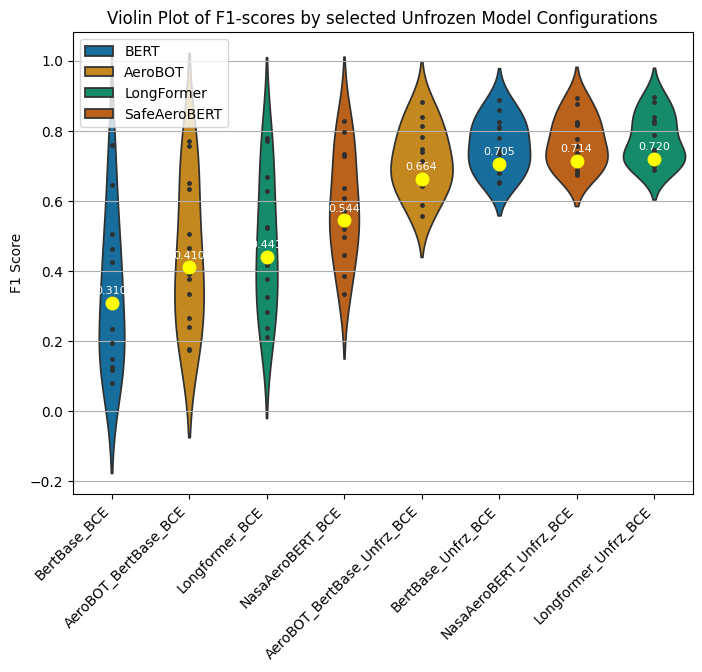

In [79]:
###########################
# Unfrozen violin plot
###########################

# Categories to exclude from plot
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']

# Filter results
filtered_boxplot = filter_boxplot("non-abbreviated", ["BCE_unbalanced"], ["unfrozen", "frozen"], "group", category_list, results)
filtered_abb = filter_results("non-abbreviated", ["BCE_unbalanced"], ["unfrozen", "frozen"], "group", "macro avg", results)

# Get unique model names for x-axis ticks
model_names = filtered_boxplot['Short_name'].unique().tolist()

# Plot
plt.figure(figsize=(8, 6))

# Violin plot
#sns.violinplot(data=filtered_boxplot, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette='deep')
sns.violinplot(data=filtered_boxplot, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette='colorblind', hue='Model')


plt.title('Violin Plot of F1-scores by selected Unfrozen Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb)):
    plt.text(filtered_abb.iloc[i]['Model Name'], filtered_abb.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()

### LOSS

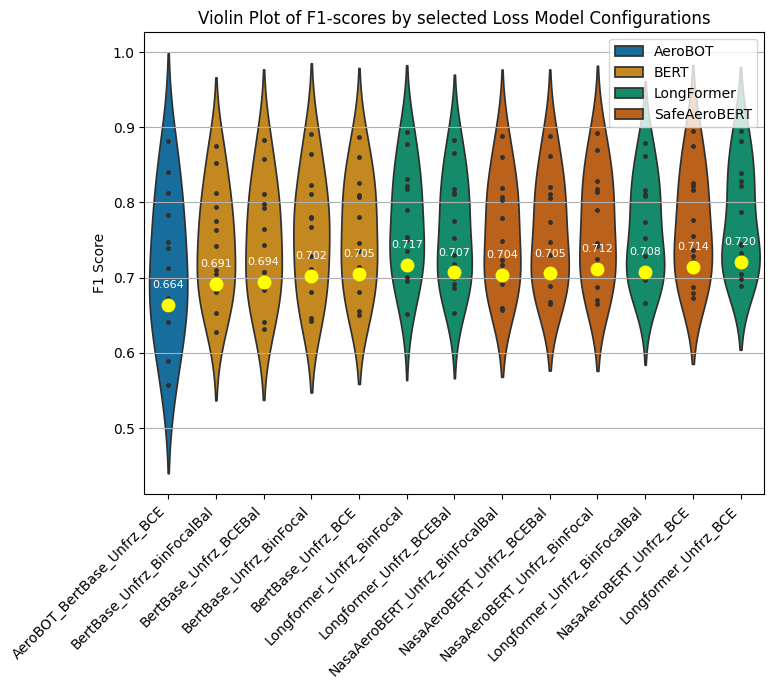

In [78]:
###########################
# Losses violin plot
###########################

# Categories to exclude from plot
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']
loss_list = ["BCE_unbalanced", "BCE_balanced", "FocalLoss_unbalanced", "FocalLoss_balanced"]
# Filter results
filtered_loss = filter_boxplot("non-abbreviated", loss_list , ["unfrozen"], "group", category_list, results)
filtered_abb = filter_results("non-abbreviated", loss_list, ["unfrozen"], "group", "macro avg", results)

# Get unique model names for x-axis ticks
model_names = filtered_loss['Short_name'].unique().tolist()

plt.figure(figsize=(8, 6))

# Violin plot with hue set to 'Model'
sns.violinplot(data=filtered_loss, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette='colorblind', hue='Model')
plt.title('Violin Plot of F1-scores by selected Loss Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb)):
    plt.text(filtered_abb.iloc[i]['Model Name'], filtered_abb.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()


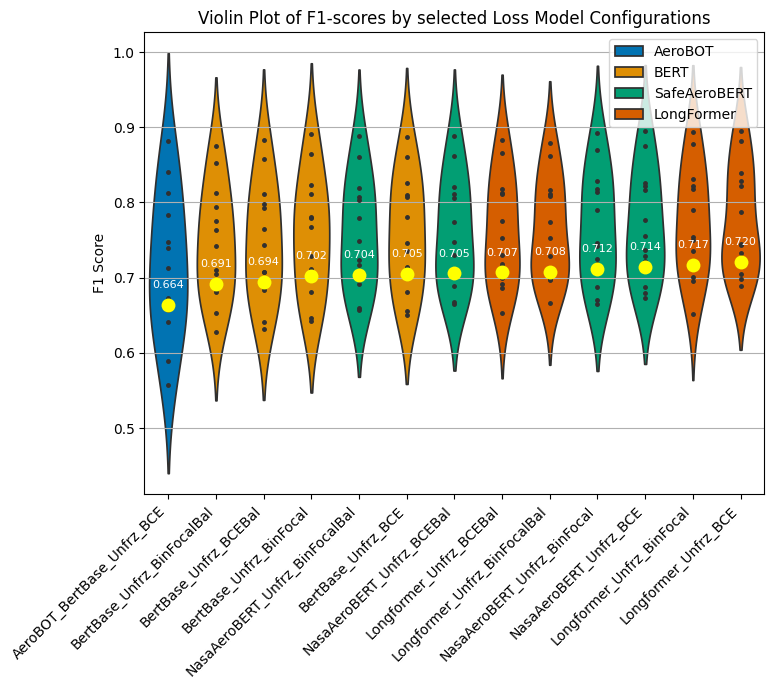

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting model configurations
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']
loss_list = ["BCE_unbalanced", "BCE_balanced", "FocalLoss_unbalanced", "FocalLoss_balanced"]


# Filter results
results2 = results.sort_values(by='f1-score')
filtered_loss = filter_boxplot("non-abbreviated", loss_list , ["unfrozen"], "group", category_list, results2)
filtered_abb = filter_results("non-abbreviated", loss_list, ["unfrozen"], "group", "macro avg", results)

# Sort filtered_loss based on 'f1-score' in ascending order
#filtered_loss_sorted = filtered_loss.sort_values(by='f1-score')
filtered_abb_sorted = filtered_abb.sort_values(by='f1-score')


# Get unique values of 'Model Name' column from filtered_abb_sorted
unique_model_names = filtered_abb_sorted['Model Name'].unique()

# Create a dictionary mapping model names to their order index
model_name_order = {name: index for index, name in enumerate(unique_model_names)}

# Add a new column to filtered_loss_sorted with the order index of the model names
filtered_loss['Model Name Order'] = filtered_loss['Model Name'].map(model_name_order)

# Sort filtered_loss_sorted by the 'Model Name Order' column
filtered_loss_sorted = filtered_loss.sort_values(by='Model Name Order')

# Remove the 'Model Name Order' column if desired
filtered_loss_sorted.drop(columns=['Model Name Order'], inplace=True)

# Get unique model names for x-axis ticks
model_names = filtered_loss_sorted['Short_name'].unique().tolist()

plt.figure(figsize=(8, 6))

# Violin plot with hue set to 'Model' and using filtered_loss_sorted data
sns.violinplot(data=filtered_loss_sorted, x="Model Name", y="f1-score", inner="points", saturation=1, palette='colorblind', hue='Model')
plt.title('Violin Plot of F1-scores by selected Loss Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb_sorted)):
    plt.text(filtered_abb_sorted.iloc[i]['Model Name'], filtered_abb_sorted.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb_sorted.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb_sorted, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()


In [81]:
filtered_abb_sorted

,Model Name,Category,binary_accuracy,precision,recall,f1-score,support,Optimization Metric,Threshold,Model,Layer,Training_data,Loss,Prediction_set,Short_name
1545,"AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 1...",macro avg,0.932445,0.659873,0.670535,0.663756,22871.0,0.663756,NaN,AeroBOT,unfrozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_Unfrz_BCE
1041,"bert-base-uncased_Unfrozen[8, 9, 10, 11]_Binar...",macro avg,0.935645,0.681267,0.705004,0.691349,22871.0,0.691349,NaN,BERT,unfrozen,non-abbreviated,FocalLoss_balanced,group,BertBase_Unfrz_BinFocalBal
177,"bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE-B...",macro avg,0.936464,0.675300,0.715542,0.693947,22871.0,0.693947,NaN,BERT,unfrozen,non-abbreviated,BCE_balanced,group,BertBase_Unfrz_BCEBal
987,"bert-base-uncased_Unfrozen[8, 9, 10, 11]_Binar...",macro avg,0.939413,0.683459,0.725273,0.702050,22871.0,0.702050,NaN,BERT,unfrozen,non-abbreviated,FocalLoss_unbalanced,group,BertBase_Unfrz_BinFocal
1059,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",macro avg,0.939208,0.691426,0.719945,0.704045,22871.0,0.704045,NaN,SafeAeroBERT,unfrozen,non-abbreviated,FocalLoss_balanced,group,NasaAeroBERT_Unfrz_BinFocalBal
51,"bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE",macro avg,0.940048,0.698886,0.712806,0.704545,22871.0,0.704545,NaN,BERT,unfrozen,non-abbreviated,BCE_unbalanced,group,BertBase_Unfrz_BCE
195,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",macro avg,0.939215,0.691737,0.721577,0.705444,22871.0,0.705444,NaN,SafeAeroBERT,unfrozen,non-abbreviated,BCE_balanced,group,NasaAeroBERT_Unfrz_BCEBal
213,"allenai_longformer-base-4096_Unfrozen[8, 9, 10...",macro avg,0.939096,0.689639,0.727085,0.706797,22871.0,0.706797,NaN,LongFormer,unfrozen,non-abbreviated,BCE_balanced,group,Longformer_Unfrz_BCEBal
1077,"allenai_longformer-base-4096_Unfrozen[8, 9, 10...",macro avg,0.938580,0.693942,0.724370,0.707800,22871.0,0.707800,NaN,LongFormer,unfrozen,non-abbreviated,FocalLoss_balanced,group,Longformer_Unfrz_BinFocalBal
1005,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",macro avg,0.941740,0.706044,0.720180,0.711722,22871.0,0.711722,NaN,SafeAeroBERT,unfrozen,non-abbreviated,FocalLoss_unbalanced,group,NasaAeroBERT_Unfrz_BinFocal


In [54]:
print(filtered_loss_sorted['Model Name'].unique())
print(filtered_abb_sorted['Model Name'].unique())


['AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE'
 'bert-base-uncased_Unfrozen[8, 9, 10, 11]_BinaryFocal-Balanced'
 'bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE-Balanced'
 'bert-base-uncased_Unfrozen[8, 9, 10, 11]_BinaryFocal'
 'bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE'
 'allenai_longformer-base-4096_Unfrozen[8, 9, 10, 11]_BinaryFocal'
 'allenai_longformer-base-4096_Unfrozen[8, 9, 10, 11]_BCE-Balanced'
 'NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]_BinaryFocal-Balanced'
 'NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]_BCE-Balanced'
 'NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]_BinaryFocal'
 'allenai_longformer-base-4096_Unfrozen[8, 9, 10, 11]_BinaryFocal-Balanced'
 'NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10, 11]_BCE'
 'allenai_longformer-base-4096_Unfrozen[8, 9, 10, 11]_BCE']
['AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE'
 'bert-base-uncased_Unfrozen[8, 9, 10, 11]_BinaryFocal-Balanced'
 'bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE-Balanced'
 'b

In [50]:
#results2[results2['Category'] == 'macro avg']['Model Name'].unique()

array(['bert-base-uncased_Subcategory_BCE-Balanced',
       'AeroBOT_bert-base-uncased_Subcategory_BCE',
       'allenai_longformer-base-4096_Subcategory_BCE-Balanced',
       'NASA-AIML_MIKA_SafeAeroBERT_Subcategory_BCE-Balanced',
       'allenai_longformer-base-4096_BinaryFocal-Balanced',
       'allenai_longformer-base-4096_BinaryFocal',
       'bert-base-uncased_BinaryFocal',
       'bert-base-uncased_BinaryFocal-Balanced',
       'NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal-Balanced',
       'NASA-AIML_MIKA_SafeAeroBERT_BinaryFocal', 'bert-base-uncased_BCE',
       'bert-base-uncased_Abbreviated_BCE',
       'bert-base-uncased_BCE-Balanced',
       'bert-base-uncased_Unfrozen[8, 9, 10, 11]_Abbreviated_Subcategory_BCE-Balanced',
       'bert-base-uncased_Unfrozen[8, 9, 10, 11]_Subcategory_BCE-Balanced',
       'bert-base-uncased_Unfrozen[8, 9, 10, 11]_Abbreviated_Subcategory_BinaryFocal-Balanced',
       'AeroBOT_bert-base-uncased_BCE',
       'bert-base-uncased_Unfrozen[8, 9, 10, 11]_

In [46]:
filtered_loss_sorted

,Model Name,Category,binary_accuracy,precision,recall,f1-score,support,Optimization Metric,Threshold,Model,Layer,Training_data,Loss,Prediction_set,Short_name
1541,"AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 1...",Deviation - Speed,0.966960,0.538462,0.575835,0.556522,389.0,0.663756,0.20,AeroBOT,unfrozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_Unfrz_BCE
1540,"AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 1...",Airspace Violation,0.967145,0.555799,0.625616,0.588644,406.0,0.663756,0.23,AeroBOT,unfrozen,non-abbreviated,BCE_unbalanced,group,AeroBOT_BertBase_Unfrz_BCE
1036,"bert-base-uncased_Unfrozen[8, 9, 10, 11]_Binar...",Airspace Violation,0.974086,0.682081,0.581281,0.627660,406.0,0.691349,0.76,BERT,unfrozen,non-abbreviated,FocalLoss_balanced,group,BertBase_Unfrz_BinFocalBal
173,"bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE-B...",Deviation - Speed,0.973438,0.630769,0.632391,0.631579,389.0,0.693947,0.96,BERT,unfrozen,non-abbreviated,BCE_balanced,group,BertBase_Unfrz_BCEBal
172,"bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE-B...",Airspace Violation,0.972420,0.627358,0.655172,0.640964,406.0,0.693947,0.93,BERT,unfrozen,non-abbreviated,BCE_balanced,group,BertBase_Unfrz_BCEBal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,"bert-base-uncased_Unfrozen[8, 9, 10, 11]_Binar...",Aircraft Equipment,0.911522,0.888889,0.891749,0.890317,4351.0,0.702050,0.51,BERT,unfrozen,non-abbreviated,FocalLoss_unbalanced,group,BertBase_Unfrz_BinFocal
991,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",Aircraft Equipment,0.910412,0.864626,0.921857,0.892325,4351.0,0.711722,0.42,SafeAeroBERT,unfrozen,non-abbreviated,FocalLoss_unbalanced,group,NasaAeroBERT_Unfrz_BinFocal
1009,"allenai_longformer-base-4096_Unfrozen[8, 9, 10...",Aircraft Equipment,0.913836,0.885309,0.903011,0.894072,4351.0,0.716904,0.51,LongFormer,unfrozen,non-abbreviated,FocalLoss_unbalanced,group,Longformer_Unfrz_BinFocal
55,"NASA-AIML_MIKA_SafeAeroBERT_Unfrozen[8, 9, 10,...",Aircraft Equipment,0.914854,0.891399,0.897954,0.894665,4351.0,0.713739,0.39,SafeAeroBERT,unfrozen,non-abbreviated,BCE_unbalanced,group,NasaAeroBERT_Unfrz_BCE


In [177]:
# Loss BCE, FocalLoss, balanced, or unbalanced
#loss = ["BCE_balanced", "BCE_unbalanced", "FocalLoss_balanced", "FocalLoss_unbalanced"]
loss = ["BCE_unbalanced", "FocalLoss_unbalanced"]

filtered_loss = filter_results("non-abbreviated", loss, "unfrozen", "subcategory", "macro avg", results)

x_values = filtered_loss["Short_name"]
y_values = filtered_loss["f1-score"]

x_values


1611    AeroBOT_BertBase_Unfrz_Subcategory_BCE
Name: Short_name, dtype: object

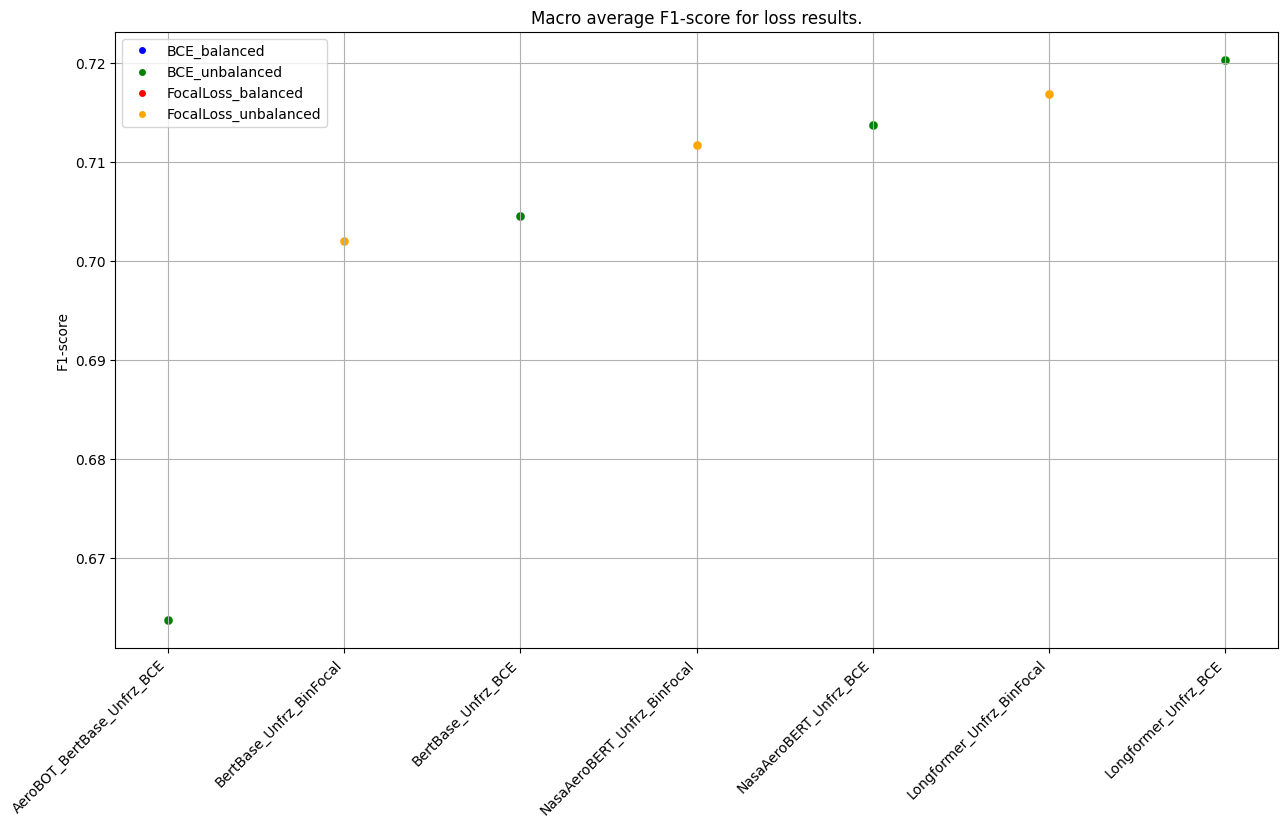

In [155]:
# Loss types
x_values = filtered_loss["Short_name"]
y_values = filtered_loss["f1-score"]
loss_types = filtered_loss["Loss"]

# Create a color map based on loss types
color_map = {
    "BCE_balanced": "blue",
    "BCE_unbalanced": "green",
    "FocalLoss_balanced": "red",
    "FocalLoss_unbalanced": "orange"
}

# Abbreviations visualization 
plt.figure(figsize=(15, 8))

# Scatter plot with different colors based on loss type
for x, y, loss_type in zip(x_values, y_values, loss_types):
    plt.scatter(x, y, color=color_map[loss_type], marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
#plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for loss results.')
plt.grid()

# Add legend based on color map
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label)
                  for label, color in color_map.items()]
plt.legend(handles=legend_handles)

# Show plot
plt.show()


### Direct Model Comparison


In [186]:
# Loss BCE, FocalLoss, balanced, or unbalanced
#filtered_model = results[(results["Model"] == "BERT") & (results["Category"] == "macro avg")].sort_values(by="f1-score")
filtered_models = results[((results["Model"] == "SafeAeroBERT") | (results["Model"] == "LongFormer")) & (results["Category"] == "macro avg")].sort_values(by="f1-score")
x_values = filtered_models["Short_name"]
y_values = filtered_models["f1-score"]

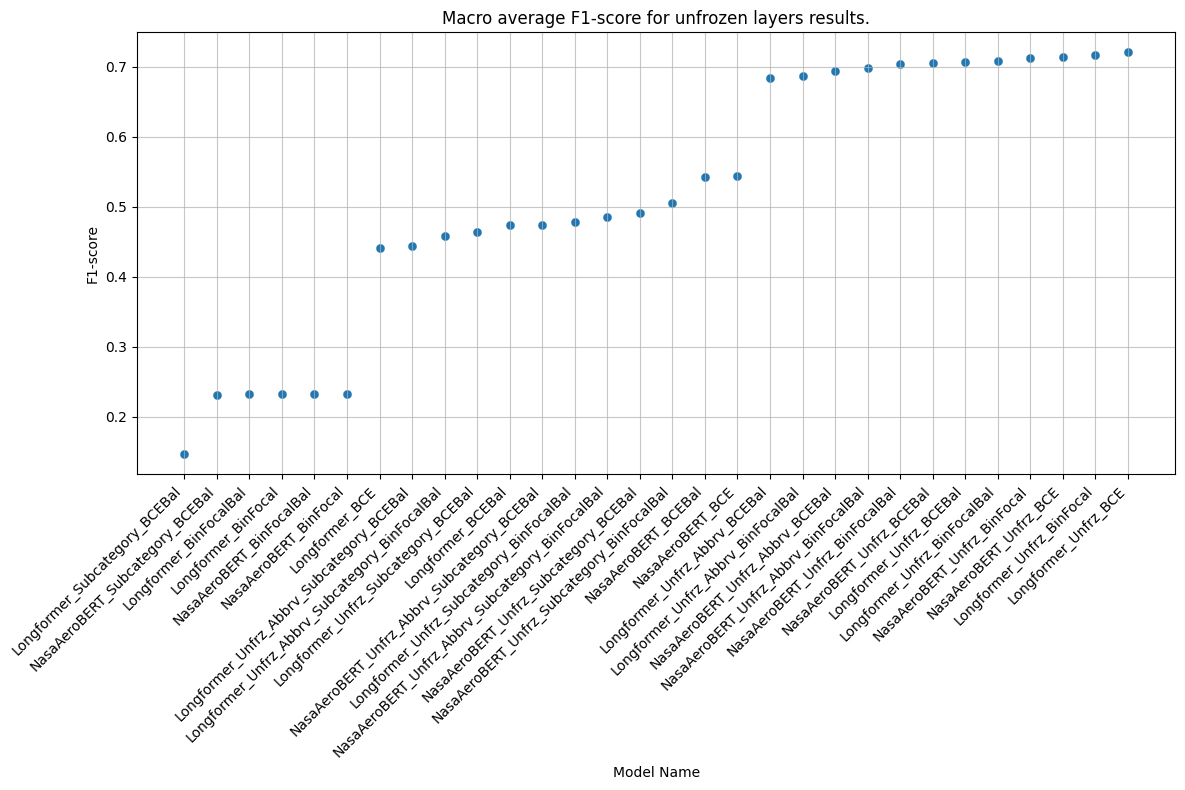

In [187]:
# Loss BCE, FocalLoss, balanced, or unbalanced
#filtered_model = results[(results["Model"] == "BERT") & (results["Category"] == "macro avg")].sort_values(by="f1-score")
filtered_models = results[((results["Model"] == "SafeAeroBERT") | (results["Model"] == "LongFormer")) & (results["Category"] == "macro avg")].sort_values(by="f1-score")
x_values = filtered_models["Short_name"]
y_values = filtered_models["f1-score"]

# Abbreviations visualization 
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(x_values, y_values, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

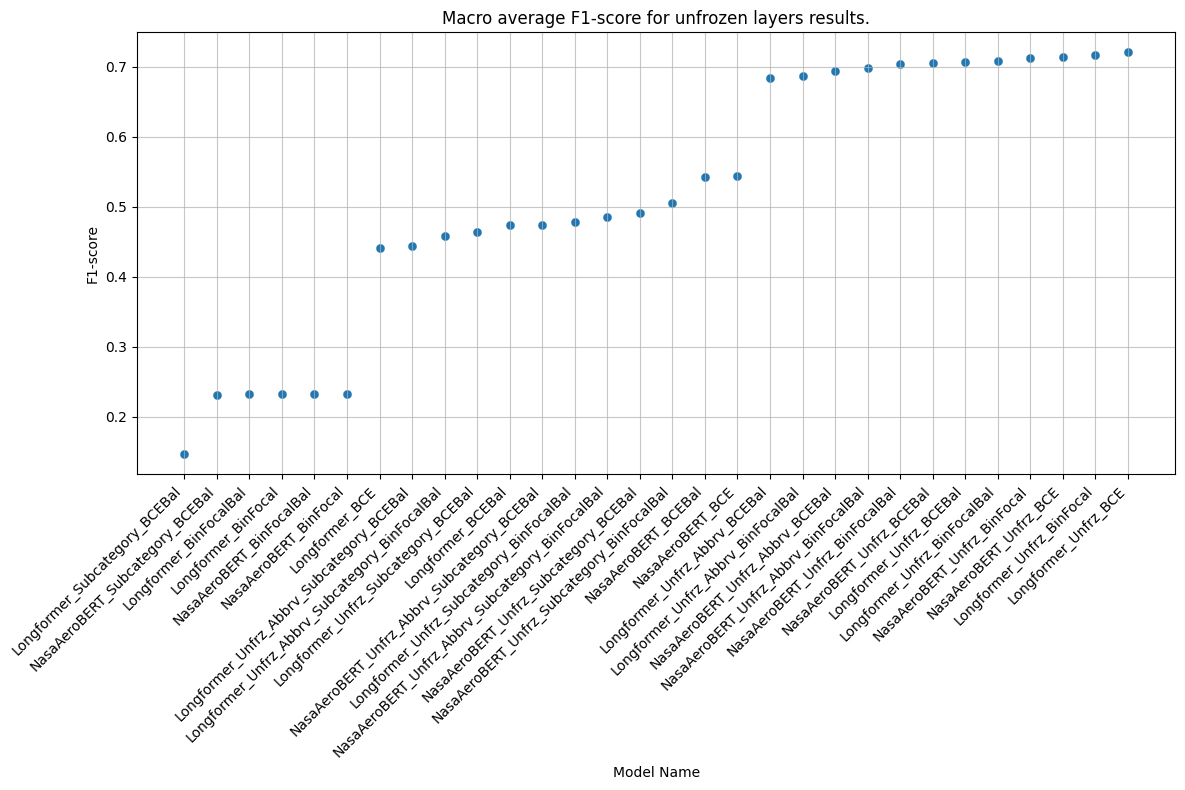

In [185]:
# Loss BCE, FocalLoss, balanced, or unbalanced
# filtered_model = results[(results["Model"] == "BERT") & (results["Category"] == "macro avg")].sort_values(by="f1-score")
# x_values = filtered_model["Short_name"]
# y_values = filtered_model["f1-score"]

# Abbreviations visualization 
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(x_values, y_values, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

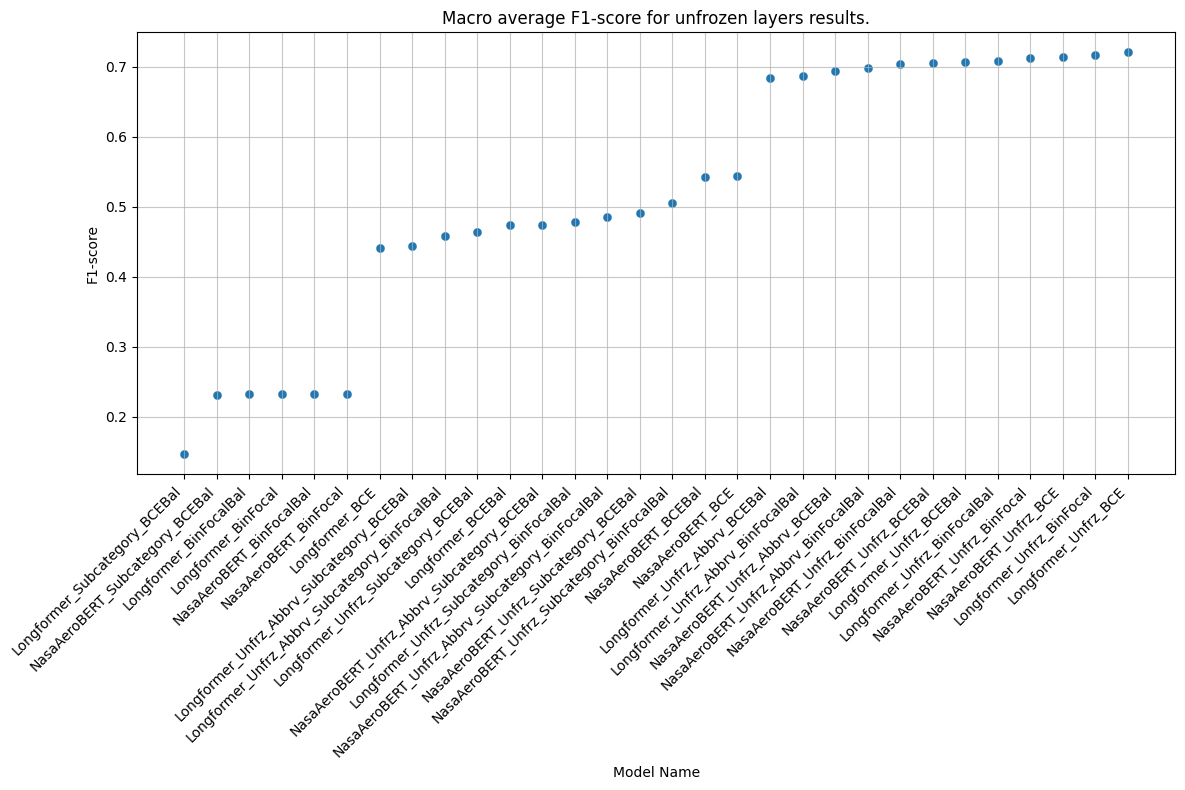

In [179]:
# Abbreviations visualization 
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(x_values, y_values, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

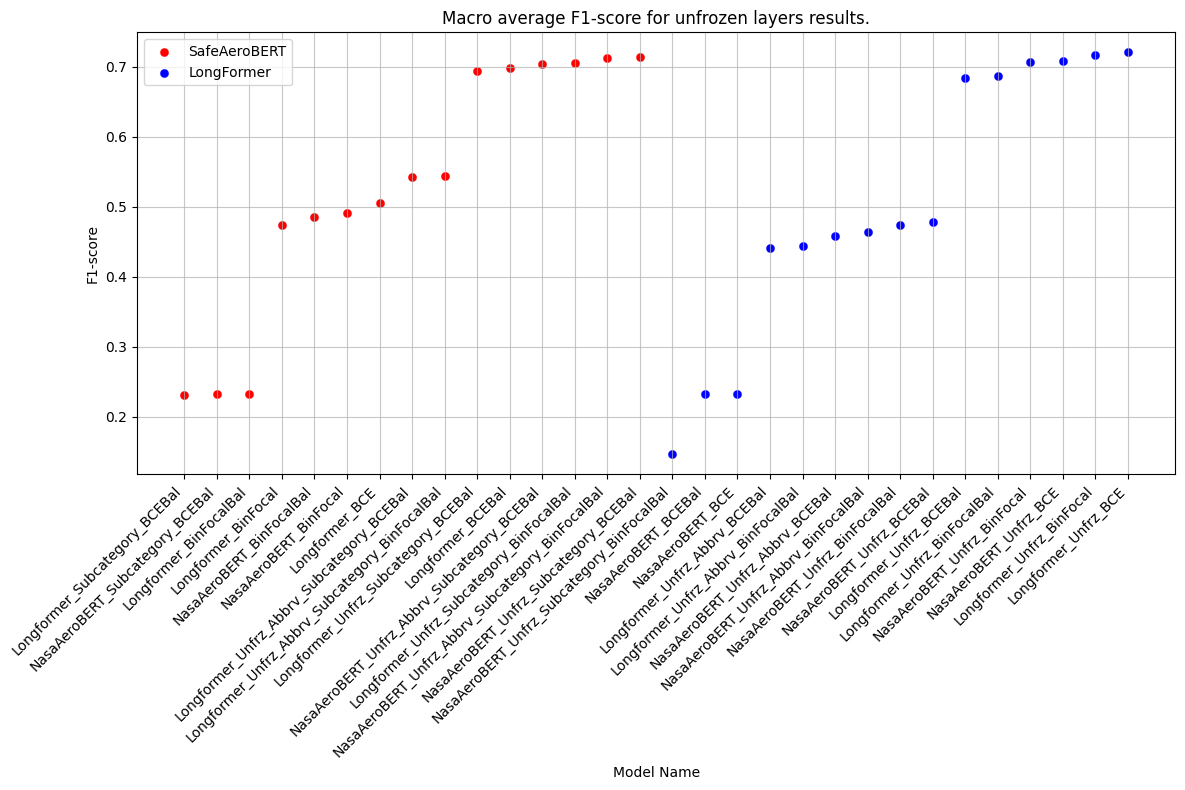

In [180]:
import matplotlib.pyplot as plt

# Loss BCE, FocalLoss, balanced, or unbalanced
filtered_models = results[((results["Model"] == "SafeAeroBERT") | (results["Model"] == "LongFormer")) & (results["Category"] == "macro avg")].sort_values(by="f1-score")
x_values = filtered_models["Short_name"]
y_values = filtered_models["f1-score"]
model_types = filtered_models["Model"]

# Abbreviations visualization 
plt.figure(figsize=(12, 8))

# Scatter plot with red and blue colors for different model types
for model_type in set(model_types):
    color = "red" if model_type == "SafeAeroBERT" else "blue"
    plt.scatter(x_values[model_types == model_type], y_values[model_types == model_type], marker='o', linewidths=0.2, color=color, label=model_type)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## Boxplot for Frozen vs Unfrozen


## Old codes


/tmp/ipykernel_30384/2546901956.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=results_filtered, palette=palette)


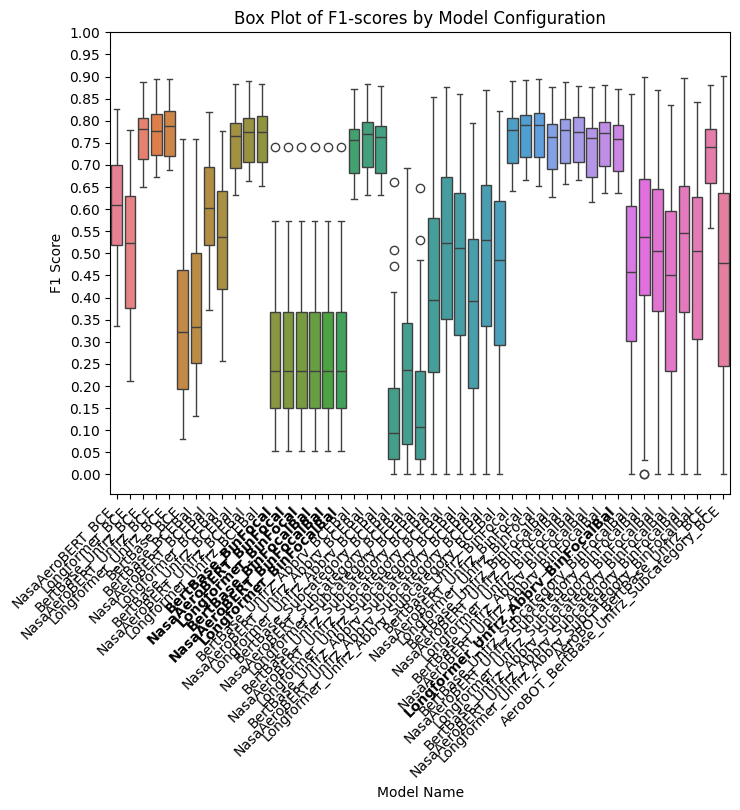

In [185]:
######################################################
# Plot of the F1-score for all model configurations
######################################################

# Filter out this outlier class 'No specific anomoly occurred' 
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=results_filtered, palette=palette)
plt.title('Box Plot of F1-scores by Model Configuration')
plt.ylabel('F1 Score')

y_ticks = np.arange(0, 1.05, 0.05)

# Formatting xticks to make the ticks with deviating results bold
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
for i, tick in enumerate(plt.gca().get_xticklabels()):
    if xticks[i] in ['BertBase_BinFocal', 'NasaAeroBERT_BinFocal', 'Longformer_BinFocal', 'BertBase_BinFocalBal', 'NasaAeroBERT_BinFocalBal', 'Longformer_BinFocalBal', 'Longformer_Unfrz_Abbrv_BinFocalBal' ]:
        tick.set_fontweight('bold')

plt.yticks(y_ticks)
plt.show()


Text(0, 0.5, 'F1-Score')

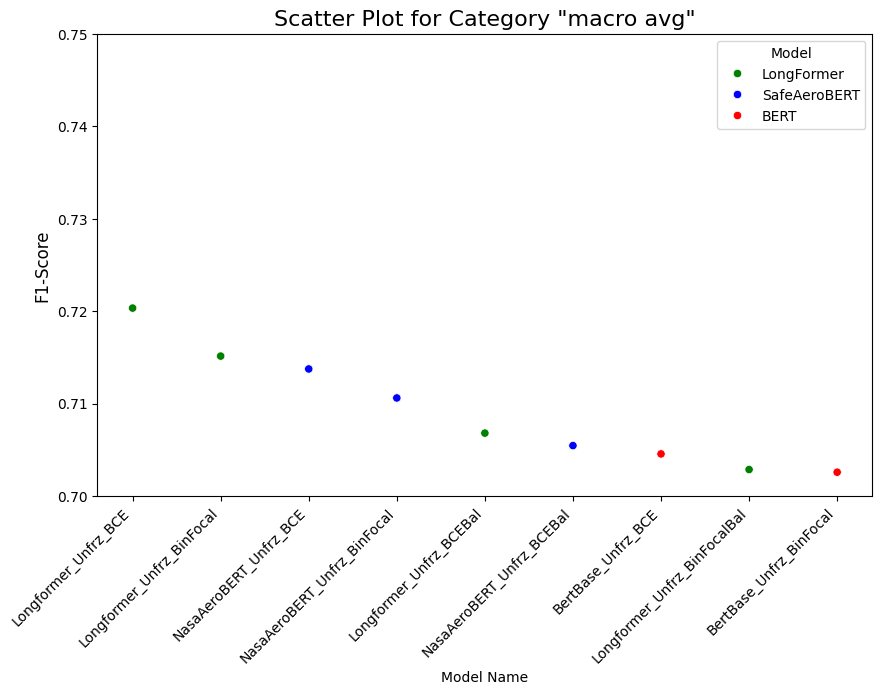

In [104]:
import numpy as np

############################################################
# Plot of the F1-score for the 10 best model configurations
############################################################

# Select best performing models
top_models = 10 
results_macro_avg = results[results["Category"] == 'macro avg']
results_macro_avg = results_macro_avg.sort_values("f1-score", ascending = False)[0:(top_models-1)]

# Create new x-axis labels
unique_categories = results_macro_avg["Model Name"].unique().tolist()
xticks_filtered = [shorten_model_name(name) for name in unique_categories]

custom_palette = {"BERT": 'red', "LongFormer": 'green', "SafeAeroBERT": 'blue'}
plt.figure(figsize=(10,6))
sns.scatterplot(x='Model Name', y = 'f1-score', data = results_macro_avg, hue="Model",palette = custom_palette)
plt.title('Scatter Plot for Category "macro avg"', fontsize=16)

y_ticks = np.arange(0.7, 0.75, 0.01)
plt.xticks(range(len(xticks_filtered)), xticks_filtered, rotation=45, ha='right')
plt.yticks(y_ticks)
plt.ylabel('F1-Score', fontsize=12)

/tmp/ipykernel_150523/946109520.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=df_abb, palette=palette)


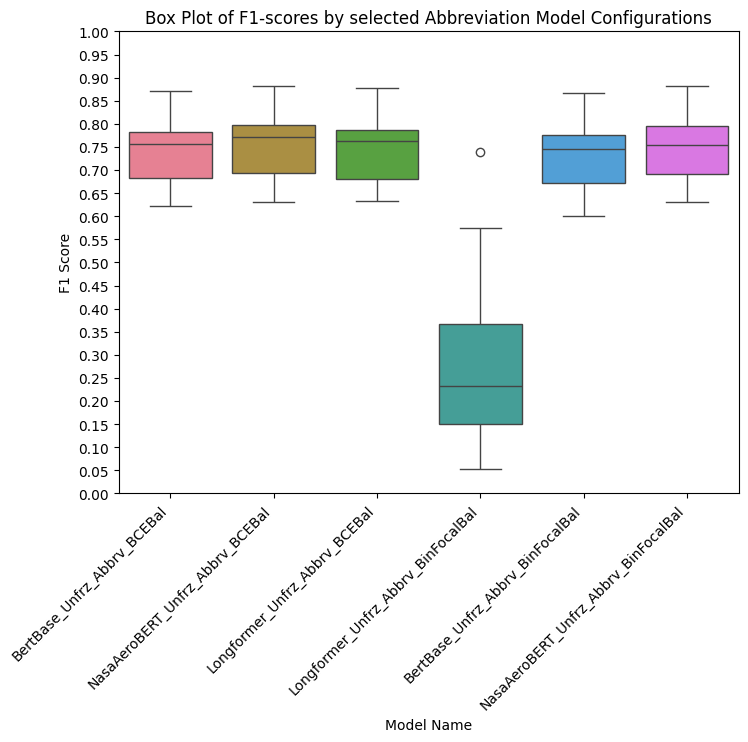

In [124]:
###############################################
# Plot of the abbreviated data
###############################################

# Filter outliers
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

# Split dataset in abbreviated and non-abbreviated models
substring_abb = 'Abbreviated'  
df_abb = results_filtered[results_filtered['Model Name'].str.contains(substring_abb)]

df_without_abb_= df_abb[~df_abb.index.isin(df_abb.index)]

# Create new x-axis labels
unique_categories = df_abb["Model Name"].unique().tolist()
xticks = [shorten_model_name(name) for name in unique_categories]

# Create graph abbreviated 
palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=df_abb, palette=palette)
plt.title('Box Plot of F1-scores by selected Abbreviation Model Configurations')
plt.ylabel('F1 Score')
y_ticks = np.arange(0, 1.05, 0.05)
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
plt.yticks(y_ticks)

plt.show()



/tmp/ipykernel_150523/602877426.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=df_without_abb, palette=palette)


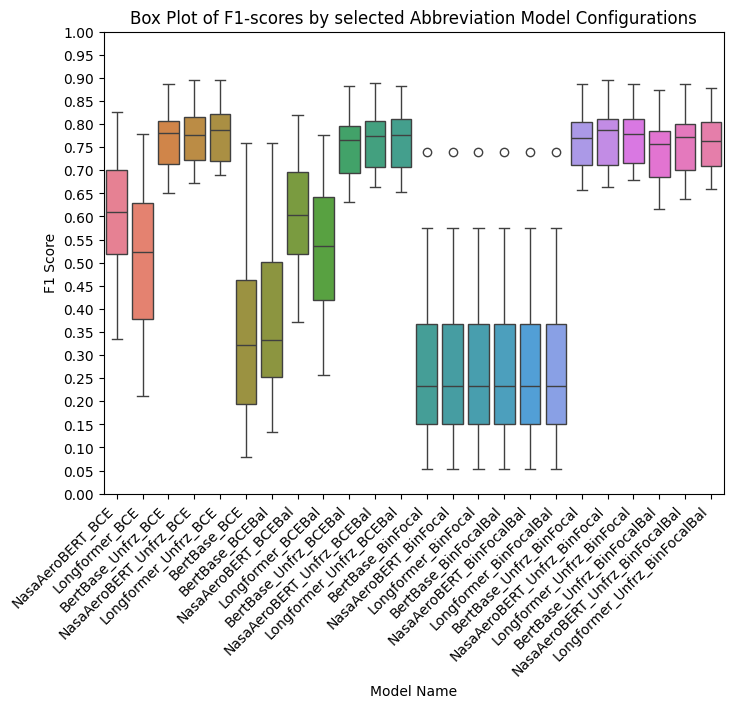

In [128]:
###############################################
# Plot of the non abbreviated data
###############################################

# Filter outliers
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

# Split dataset in abbreviated and non-abbreviated models
df_without_abb_= df_abb[~df_abb.index.isin(df_abb.index)]

# Create new x-axis labels
unique_categories = df_without_abb["Model Name"].unique().tolist()
xticks = [shorten_model_name(name) for name in unique_categories]

# Create graph abbreviated 
palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=df_without_abb, palette=palette)
plt.title('Box Plot of F1-scores by selected Abbreviation Model Configurations')
plt.ylabel('F1 Score')
y_ticks = np.arange(0, 1.05, 0.05)
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
plt.yticks(y_ticks)

plt.show()

In [ ]:
exclude_categories = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
filtered_df = results[~results['Category'].isin(exclude_categories)]